## ARM

(A)

* Association Rule Mining (ARM) is a fundamental technique in data mining that identifies interesting relationships, patterns, or associations between items in large datasets. It is commonly used in market basket analysis to find correlations between different items purchased together. ARM works by discovering rules from frequent itemsets, where each rule is an implication of the form X → Y, meaning if X occurs, then Y is likely to occur.

#### Key Measures in ARM

##### 1. Support:
* Support is a measure of how frequently an itemset appears in the dataset.

**Formula:**
**Support(X)** = Number of transactions containing/Total number of transactions

​**Interpretation:** A high support value indicates that the itemset appears frequently in the dataset.

##### 2. Confidence:
* Confidence measures how often the rule X → Y is found to be true.

**Formula:**
**Confidence(X→Y)** = Support(X∪Y) / Support(X)

**Interpretation:** Confidence represents the strength of the implication, i.e., the likelihood that Y is purchased when X is purchased.

##### 3. Lift:
* Lift measures how much more likely Y is to be purchased when X is purchased, compared to the baseline likelihood of Y being purchased alone.

**Formula:**
**Lift(X→Y)** =Confidence(X→Y) / Support(Y)

**Interpretation:** Lift > 1 suggests a positive correlation between X and Y; Lift < 1 indicates a negative correlation; and Lift = 1 suggests independence between X and Y.

#### What are Rules in ARM?

* A rule in ARM is an expression of the form X → Y, where X and Y are itemsets. The rule indicates that if itemset X occurs, itemset Y is likely to occur as well. For example, in a supermarket dataset, a rule could be Milk → Bread, meaning customers who buy milk are likely to also buy bread.

* Each rule is evaluated based on the measures of support, confidence, and lift to determine its strength and usefulness.

#### The Apriori Algorithm

* The Apriori algorithm is one of the most widely used algorithms for association rule mining. It works by identifying the frequent itemsets (groups of items that appear together frequently in transactions) and then generating rules from these itemsets.

**How the Apriori Algorithm Works:**

Frequent Itemset Generation:

**Step 1:** Start by identifying all 1-itemsets (sets containing a single item) that meet a minimum support threshold.  
**Step 2:** Iteratively combine the frequent itemsets of size k to generate itemsets of size k+1 (called candidate itemsets), and check their support.  
**Step 3:** Continue this process until no more frequent itemsets can be generated.

**Pruning:**

* The Apriori algorithm uses the Apriori property, which states that if an itemset is frequent, all of its subsets must also be frequent. Therefore, it prunes the search space by eliminating candidate itemsets whose subsets are not frequent, reducing computational cost.
  
**Rule Generation:**
* Once all the frequent itemsets are identified, rules of the form X → Y are generated. These rules are evaluated based on confidence and lift, and only the rules meeting minimum confidence and lift thresholds are retained.

(B)

In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv('/Users/Intel/Desktop/spring 2025/ML/ML_FINAL_PROJECT/Train_Preprocessed.csv')

In [14]:
df.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,date,Unemployment_Rate,Credit_Score
0,2022-01-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,26.822620,265,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,2022-01-01,4.0,Good
1,2022-02-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",4.428571,...,31.944960,268,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,2022-02-01,3.8,Good
2,2022-03-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",3.000000,...,28.609352,267,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,2022-03-01,3.7,Good
3,2022-04-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",5.000000,...,31.377862,268,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,2022-04-01,3.7,Good
4,2022-05-01,23,Scientist,19114.12,3.0,4.0,3,4,"Auto Loan, Credit-Builder Loan, Home Equity Lo...",6.000000,...,24.797347,269,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,2022-05-01,3.6,Good


In [16]:
def prepare_data_for_arm(df):
    # Create a binary matrix where 1 indicates the presence of an item
    df_binary = df.copy()

    # Define discretization bins for each numeric column
    discretization_bins = {
        'Age': [-np.inf, 18, 25, 35, 45, 55, np.inf],   
        'Annual_Income': [-np.inf, 20000, 50000, 80000, 110000, 140000, np.inf],  
        'Num_Bank_Accounts': [-np.inf, 2, 5, 8, np.inf],  
        'Num_Credit_Card': [-np.inf, 2, 5, 8, np.inf],  
        'Interest_Rate': [-np.inf, 5, 15, 25, 35, np.inf],  
        'Num_of_Loan': [-np.inf, 2, 4, 6, 8, np.inf],  
        'Delay_from_due_date': [-np.inf, 10, 25, 40, 55, 70, np.inf],  
        'Num_of_Delayed_Payment': [-np.inf, 5, 15, 25, np.inf],  
        'Changed_Credit_Limit': [-np.inf, 0, 10, 20, 30, np.inf],  
        'Num_Credit_Inquiries': [-np.inf, 5, 10, 15, np.inf],  
        'Outstanding_Debt': [-np.inf, 1000, 2000, 3000, 4000, np.inf],  
        'Credit_Utilization_Ratio': [-np.inf, 10, 25, 40, np.inf],  
        'Credit_History_Age': [-np.inf, 100, 200, 300, np.inf],  
        'Total_EMI_per_month': [-np.inf, 50, 150, 300, 450, 600, np.inf],  
        'Amount_invested_monthly': [-np.inf, 0, 500, 1000, 1500, 2000, np.inf],  
        'Monthly_Balance': [-np.inf, 150, 300, 450, 600, 750, np.inf],  
        'Unemployment_Rate': [-np.inf, 3.2, 3.4, 3.6, 3.8, np.inf]  
    }

    # Discretize numeric columns into specified bins
    for col, bins in discretization_bins.items():
        if col in df_binary.columns:
            df_binary[col] = pd.cut(df_binary[col], bins=bins, labels=False, right=False)

    # Convert categorical columns to binary (one-hot encoding)
    categorical_cols = df_binary.select_dtypes(include=['object']).columns.tolist()
    df_binary = pd.get_dummies(df_binary, columns=categorical_cols, drop_first=True)

    # Convert all columns into binary format (0 or 1) based on a condition (e.g., value > 0)
    df_binary = df_binary.applymap(lambda x: 1 if x > 0 else 0)

    # Drop the original numeric columns that have been replaced by the binned data
    for col in discretization_bins.keys():
        if col in df_binary.columns:
            df_binary.drop(columns=[col], inplace=True)

    return df_binary

# Prepare the data for ARM
df1 = df.drop(columns=['Credit_Score'])
df_transactions = prepare_data_for_arm(df1)

/var/folders/s0/9c8j0gnd1_l2cgnr9wq06b7r0000gn/T/ipykernel_6525/869813504.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_binary.applymap(lambda x: 1 if x > 0 else 0)


In [17]:
# Check the transformed data to ensure it has only 0s and 1s
df_transactions.head()

,Month_2022-02-01,Month_2022-03-01,Month_2022-04-01,Month_2022-05-01,Month_2022-06-01,Month_2022-07-01,Month_2022-08-01,Occupation_Architect,Occupation_Developer,Occupation_Doctor,...,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,date_2022-02-01,date_2022-03-01,date_2022-04-01,date_2022-05-01,date_2022-06-01,date_2022-07-01,date_2022-08-01
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


(C)

In [19]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(df_transactions, min_support=0.05, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the rules
print("Association Rules:\n")
rules.head()

/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Association Rules:



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Month_2022-02-01),(Payment_of_Min_Amount_Yes),0.125,0.59432,0.07429,0.59432,1.0,1.0,0.000000,1.0,0.0,0.115173,0.0,0.35966
1,(date_2022-02-01),(Month_2022-02-01),0.125,0.12500,0.12500,1.00000,8.0,1.0,0.109375,inf,1.0,1.000000,1.0,1.00000
2,(Month_2022-02-01),(date_2022-02-01),0.125,0.12500,0.12500,1.00000,8.0,1.0,0.109375,inf,1.0,1.000000,1.0,1.00000
3,(Month_2022-03-01),(Payment_of_Min_Amount_Yes),0.125,0.59432,0.07429,0.59432,1.0,1.0,0.000000,1.0,0.0,0.115173,0.0,0.35966
4,(date_2022-03-01),(Month_2022-03-01),0.125,0.12500,0.12500,1.00000,8.0,1.0,0.109375,inf,1.0,1.000000,1.0,1.00000


* The code first applies the Apriori algorithm to find frequent itemsets in a transactional dataset, considering only those with a support of at least 5% (appearing in 5% of transactions). Next, it generates association rules based on these itemsets, using a confidence threshold of 50%, which shows how likely items are to appear together. Finally, the top association rules are displayed to identify meaningful patterns in the data.

In [21]:
len(rules)

91

In [22]:
# Top 15 rules for support
top_support = rules.sort_values(by='support', ascending=False).head(15)
top_support

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
23,(Credit_Mix_Standard),(Payment_of_Min_Amount_Yes),0.45848,0.59432,0.35664,0.777875,1.308848,1.0,0.084156,1.826357,0.435754,0.512296,0.452462,0.688978
22,(Payment_of_Min_Amount_Yes),(Credit_Mix_Standard),0.59432,0.45848,0.35664,0.600081,1.308848,1.0,0.084156,1.354073,0.581664,0.512296,0.261488,0.688978
28,(Payment_Behaviour_Low_spent_Small_value_payme...,(Payment_of_Min_Amount_Yes),0.27767,0.59432,0.18593,0.669608,1.126679,1.0,0.020905,1.227874,0.155657,0.271011,0.185584,0.491226
10,(date_2022-05-01),(Month_2022-05-01),0.12500,0.12500,0.12500,1.000000,8.000000,1.0,0.109375,inf,1.000000,1.000000,1.000000,1.000000
16,(date_2022-07-01),(Month_2022-07-01),0.12500,0.12500,0.12500,1.000000,8.000000,1.0,0.109375,inf,1.000000,1.000000,1.000000,1.000000
20,(Month_2022-08-01),(date_2022-08-01),0.12500,0.12500,0.12500,1.000000,8.000000,1.0,0.109375,inf,1.000000,1.000000,1.000000,1.000000
14,(Month_2022-06-01),(date_2022-06-01),0.12500,0.12500,0.12500,1.000000,8.000000,1.0,0.109375,inf,1.000000,1.000000,1.000000,1.000000
13,(date_2022-06-01),(Month_2022-06-01),0.12500,0.12500,0.12500,1.000000,8.000000,1.0,0.109375,inf,1.000000,1.000000,1.000000,1.000000
11,(Month_2022-05-01),(date_2022-05-01),0.12500,0.12500,0.12500,1.000000,8.000000,1.0,0.109375,inf,1.000000,1.000000,1.000000,1.000000
17,(Month_2022-07-01),(date_2022-07-01),0.12500,0.12500,0.12500,1.000000,8.000000,1.0,0.109375,inf,1.000000,1.000000,1.000000,1.000000


* This code sorts the generated association rules by support in descending order, meaning it prioritizes the rules that appear most frequently in the dataset. It then selects and displays the top 15 rules with the highest support values.

In [24]:
# Top 15 rules for confidence
top_confidence = rules.sort_values(by='confidence', ascending=False).head(15)
top_confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
45,"(date_2022-03-01, Payment_of_Min_Amount_Yes)",(Month_2022-03-01),0.07429,0.125,0.07429,1.0,8.0,1.0,0.065004,inf,0.945220,0.59432,1.0,0.79716
54,"(Payment_of_Min_Amount_Yes, Month_2022-04-01)",(date_2022-04-01),0.07429,0.125,0.07429,1.0,8.0,1.0,0.065004,inf,0.945220,0.59432,1.0,0.79716
67,"(Payment_of_Min_Amount_Yes, Month_2022-06-01)",(date_2022-06-01),0.07429,0.125,0.07429,1.0,8.0,1.0,0.065004,inf,0.945220,0.59432,1.0,0.79716
66,"(Payment_of_Min_Amount_Yes, date_2022-06-01)",(Month_2022-06-01),0.07429,0.125,0.07429,1.0,8.0,1.0,0.065004,inf,0.945220,0.59432,1.0,0.79716
65,"(Credit_Mix_Standard, Month_2022-06-01)",(date_2022-06-01),0.05731,0.125,0.05731,1.0,8.0,1.0,0.050146,inf,0.928195,0.45848,1.0,0.72924
64,"(Credit_Mix_Standard, date_2022-06-01)",(Month_2022-06-01),0.05731,0.125,0.05731,1.0,8.0,1.0,0.050146,inf,0.928195,0.45848,1.0,0.72924
61,"(Payment_of_Min_Amount_Yes, Month_2022-05-01)",(date_2022-05-01),0.07429,0.125,0.07429,1.0,8.0,1.0,0.065004,inf,0.945220,0.59432,1.0,0.79716
59,"(date_2022-05-01, Payment_of_Min_Amount_Yes)",(Month_2022-05-01),0.07429,0.125,0.07429,1.0,8.0,1.0,0.065004,inf,0.945220,0.59432,1.0,0.79716
58,"(Month_2022-05-01, Credit_Mix_Standard)",(date_2022-05-01),0.05731,0.125,0.05731,1.0,8.0,1.0,0.050146,inf,0.928195,0.45848,1.0,0.72924
57,"(date_2022-05-01, Credit_Mix_Standard)",(Month_2022-05-01),0.05731,0.125,0.05731,1.0,8.0,1.0,0.050146,inf,0.928195,0.45848,1.0,0.72924


* This code sorts the association rules by confidence in descending order, meaning it prioritizes the rules that are most likely to hold true. It then selects and displays the top 15 rules with the highest confidence values.

In [26]:
# Top 15 rules for lift
top_lift = rules.sort_values(by='lift', ascending=False).head(15)
top_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
45,"(date_2022-03-01, Payment_of_Min_Amount_Yes)",(Month_2022-03-01),0.07429,0.12500,0.07429,1.00000,8.0,1.0,0.065004,inf,0.945220,0.59432,1.000000,0.79716
43,"(date_2022-03-01, Credit_Mix_Standard)",(Month_2022-03-01),0.05731,0.12500,0.05731,1.00000,8.0,1.0,0.050146,inf,0.928195,0.45848,1.000000,0.72924
67,"(Payment_of_Min_Amount_Yes, Month_2022-06-01)",(date_2022-06-01),0.07429,0.12500,0.07429,1.00000,8.0,1.0,0.065004,inf,0.945220,0.59432,1.000000,0.79716
66,"(Payment_of_Min_Amount_Yes, date_2022-06-01)",(Month_2022-06-01),0.07429,0.12500,0.07429,1.00000,8.0,1.0,0.065004,inf,0.945220,0.59432,1.000000,0.79716
65,"(Credit_Mix_Standard, Month_2022-06-01)",(date_2022-06-01),0.05731,0.12500,0.05731,1.00000,8.0,1.0,0.050146,inf,0.928195,0.45848,1.000000,0.72924
64,"(Credit_Mix_Standard, date_2022-06-01)",(Month_2022-06-01),0.05731,0.12500,0.05731,1.00000,8.0,1.0,0.050146,inf,0.928195,0.45848,1.000000,0.72924
63,(Month_2022-05-01),"(date_2022-05-01, Payment_of_Min_Amount_Yes)",0.12500,0.07429,0.07429,0.59432,8.0,1.0,0.065004,2.281872,1.000000,0.59432,0.561763,0.79716
36,"(Credit_Mix_Standard, date_2022-02-01)",(Month_2022-02-01),0.05731,0.12500,0.05731,1.00000,8.0,1.0,0.050146,inf,0.928195,0.45848,1.000000,0.72924
37,"(Credit_Mix_Standard, Month_2022-02-01)",(date_2022-02-01),0.05731,0.12500,0.05731,1.00000,8.0,1.0,0.050146,inf,0.928195,0.45848,1.000000,0.72924
38,"(Payment_of_Min_Amount_Yes, date_2022-02-01)",(Month_2022-02-01),0.07429,0.12500,0.07429,1.00000,8.0,1.0,0.065004,inf,0.945220,0.59432,1.000000,0.79716


* This code sorts the association rules by lift in descending order, focusing on rules that have the strongest association between the antecedent and the consequent. It then selects and displays the top 15 rules with the highest lift values. Lift measures how much more likely the consequent is given the antecedent, compared to random chance

/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Users/Intel/Desktop/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


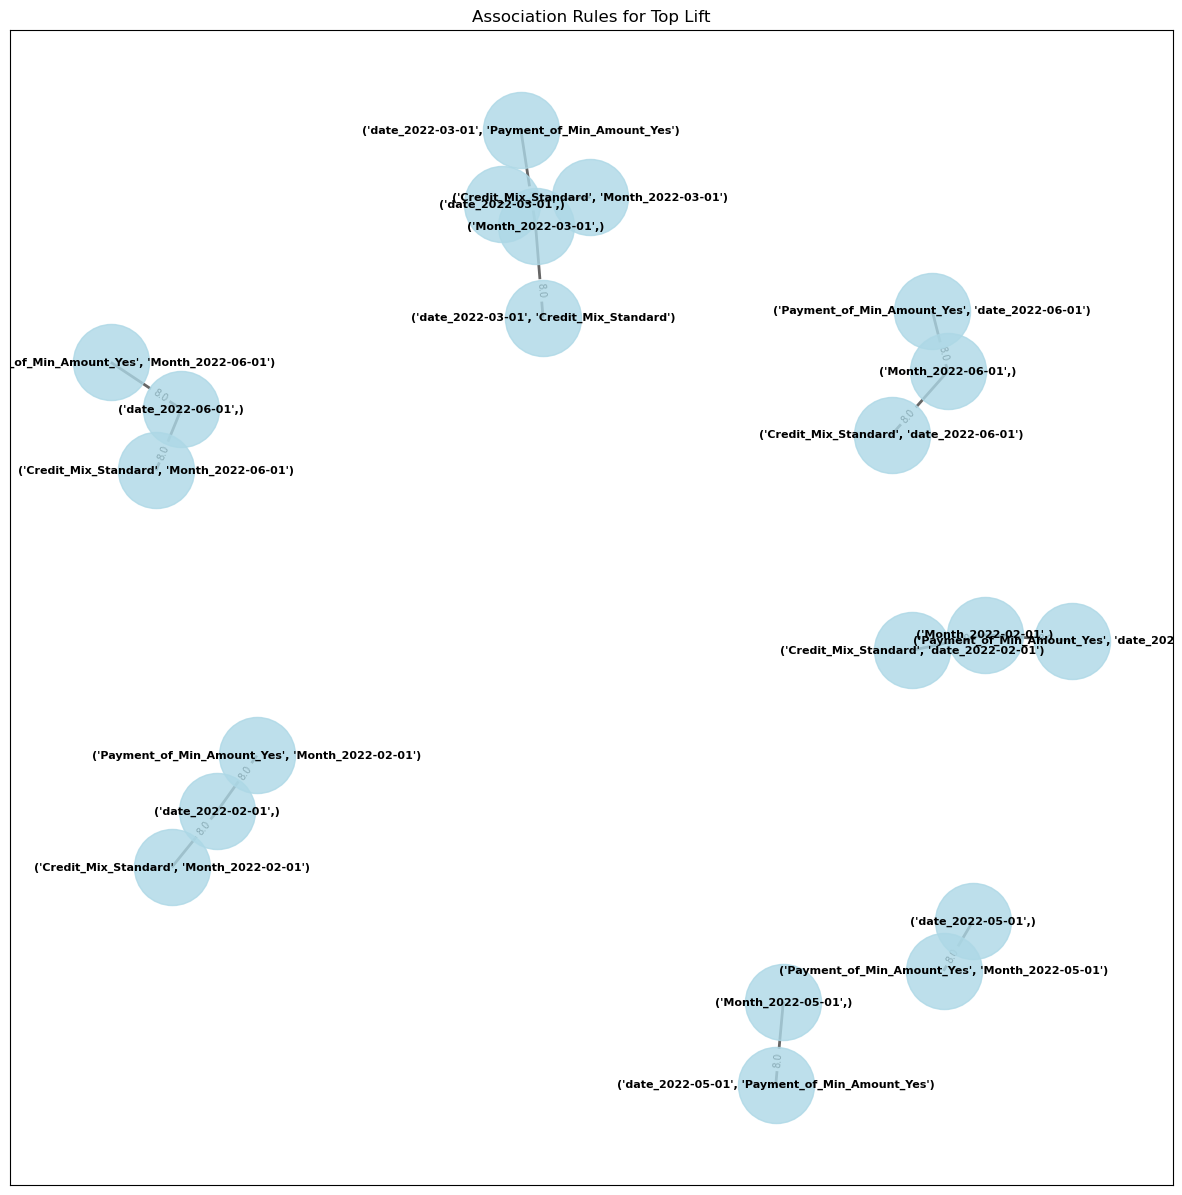

In [28]:
# Function to plot a simplified network graph of the association rules
def plot_simplified_network_graph(rules, title):
    G = nx.Graph()
    for idx, row in rules.iterrows():
        antecedent = tuple(row['antecedents'])
        consequent = tuple(row['consequents'])
        G.add_edge(antecedent, consequent, weight=row['lift'])

    pos = nx.spring_layout(G, k=0.6, seed=42)
    plt.figure(figsize=(15, 15))
    
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightblue', alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, label_pos=0.3)
    
    plt.title(title)
    plt.show()

# Visualize the simplified network graph
plot_simplified_network_graph(top_lift, "Association Rules for Top Lift")

* The graph visualizes association rules that maximize lift. Each node represents a feature or combination of features (e.g., 'Age', 'Unemployment Rate'), and edges connect features with high lift values. Lift is a measure of how much more frequently the rule appears than expected if the items were independent.

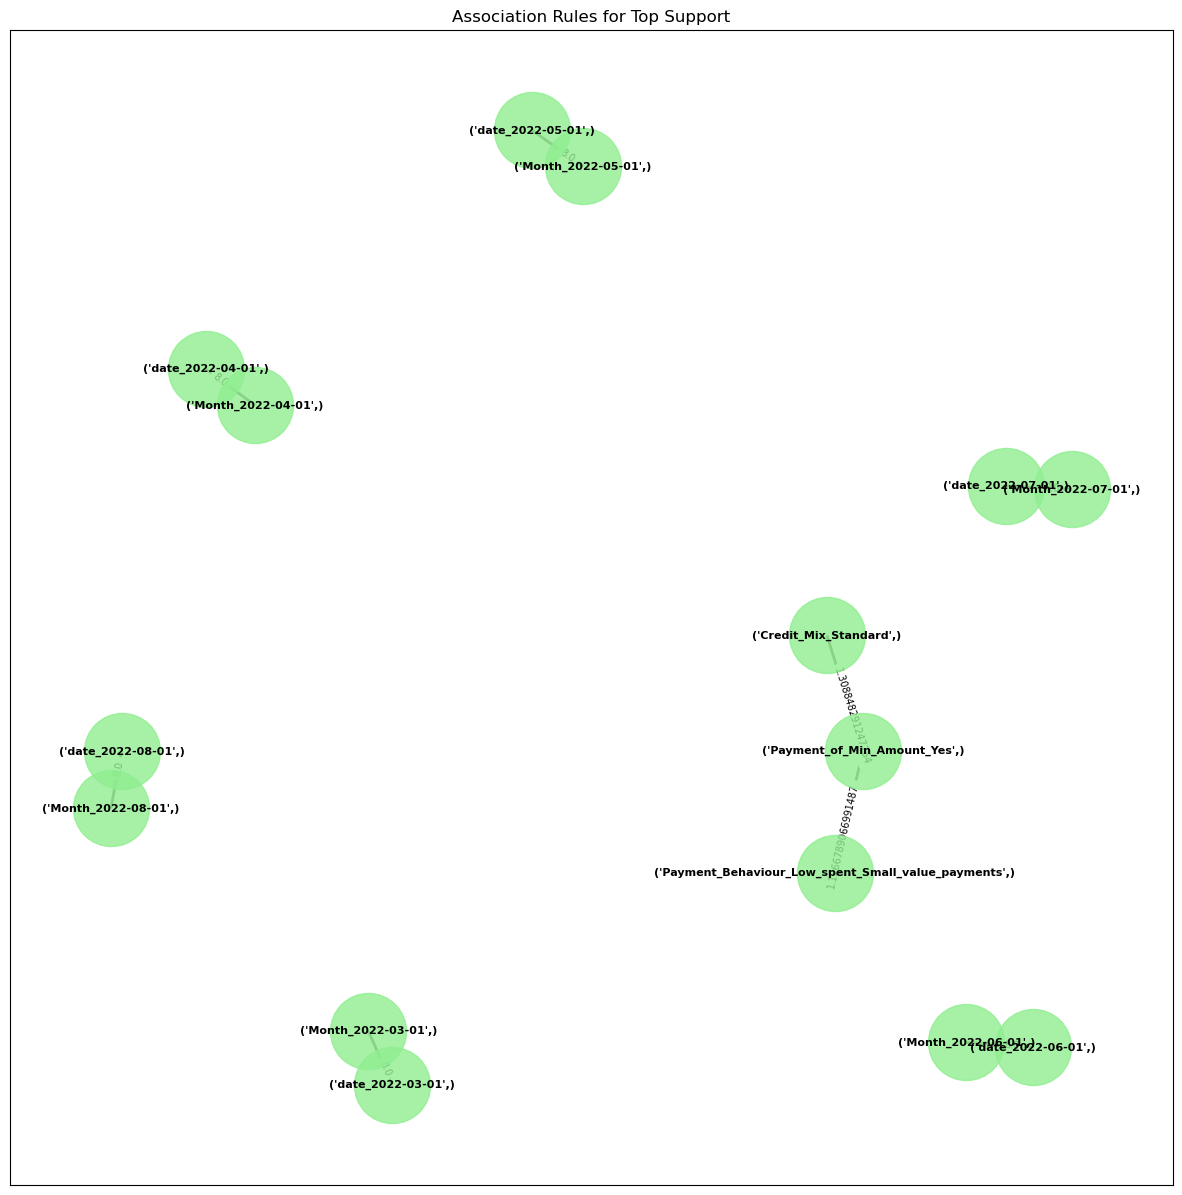

In [30]:
# Function to plot a simplified network graph of the association rules
def plot_simplified_network_graph(rules, title):
    G = nx.Graph()
    for idx, row in rules.iterrows():
        antecedent = tuple(row['antecedents'])
        consequent = tuple(row['consequents'])
        G.add_edge(antecedent, consequent, weight=row['lift'])

    pos = nx.spring_layout(G, k=0.6, seed=42)
    plt.figure(figsize=(15, 15))
    
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='lightgreen', alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, label_pos=0.3)
    
    plt.title(title)
    plt.show()

# Visualize the simplified network graph
plot_simplified_network_graph(top_support, "Association Rules for Top Support")

* The graph shows rules based on support. Each node again represents a feature or combination of features, but here the focus is on how frequently the rule appears in the dataset. Strong connections with high support (frequent co-occurrence) are represented between features.

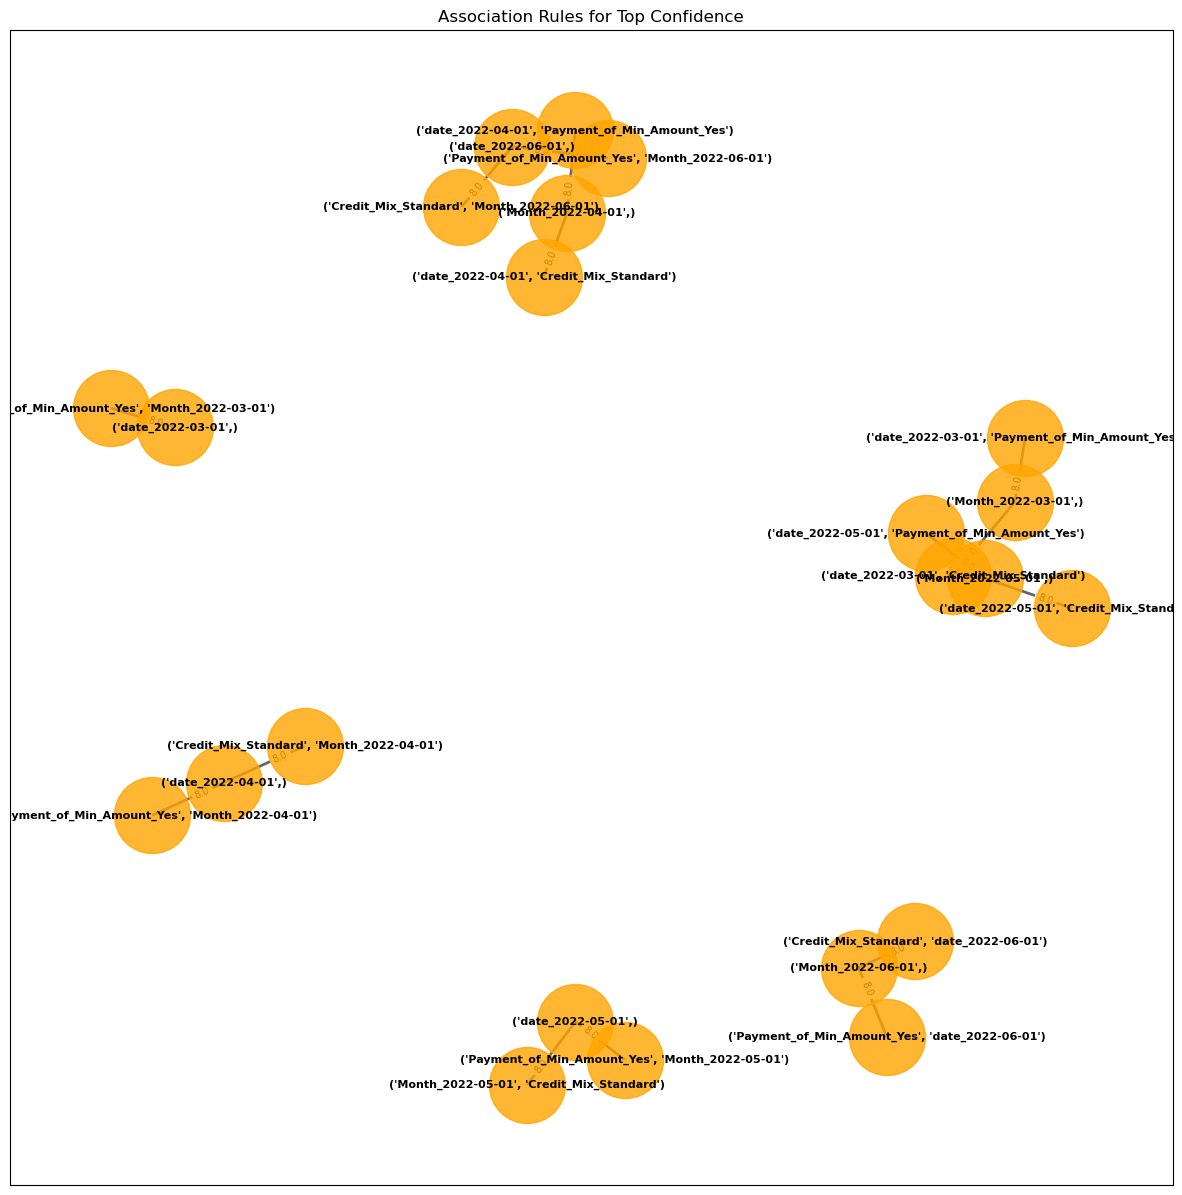

In [32]:
# Function to plot a simplified network graph of the association rules
def plot_simplified_network_graph(rules, title):
    G = nx.Graph()
    for idx, row in rules.iterrows():
        antecedent = tuple(row['antecedents'])
        consequent = tuple(row['consequents'])
        G.add_edge(antecedent, consequent, weight=row['lift'])

    pos = nx.spring_layout(G, k=0.6, seed=42)
    plt.figure(figsize=(15, 15))
    
    nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='orange', alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', font_weight='bold')
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, label_pos=0.3)
    
    plt.title(title)
    plt.show()

# Visualize the simplified network graph
plot_simplified_network_graph(top_confidence, "Association Rules for Top Confidence")

* This plot visualizes association rules with the highest confidence as a network graph. Each node represents an itemset, and the lines (edges) between them represent the association rules. The thickness and labeling of the edges indicate the confidence of the rules, where higher confidence means stronger relationships between the itemsets. Larger nodes may indicate more significant or frequent itemsets, while smaller nodes represent less frequent ones. This structure helps to see how different itemsets are connected based on confidence.